In [1]:
from IPython.display import display, Image

In [2]:
import mglearn
import matplotlib.pyplot as plt

### 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


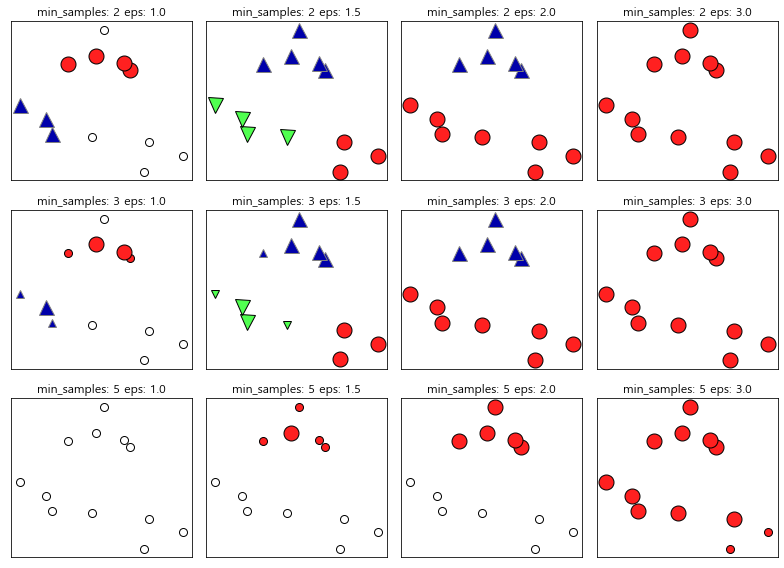

In [3]:
mglearn.plots.plot_dbscan()

### 포인트종류
* 핵심 샘플(core point) : eps 안에 min_samples보다 같거나 많다
* 경계 포인트(border point) : eps 안에 min_samples보다 작은데, core point가 있다.
* 잡음 포인트(noise point) : eps 안에 min_samples보다 작고, 포인트 줄에 core point가 없다. 어떤 클래스에도 소속되지 않음.

Text(0, 0.5, '특성 1')

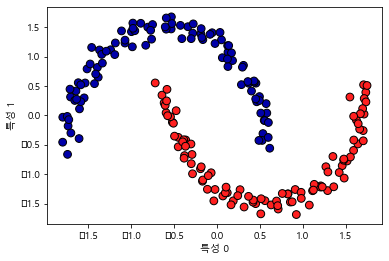

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균 0, 분산 1이 되도록 데이터 스케일 조정
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()  # eps=0.5, min_samples = 5 가 기본값
clusters = dbscan.fit_predict(X_scaled)

# 클러스터 할당을 표시한다.
plt.scatter(X_scaled[:,0], X_scaled[:,1], 
           c=clusters, 
           cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### DBSCAN의 알고리즘을 적용하여 레이블을 만든다.

Text(0, 0.5, '특성 1')

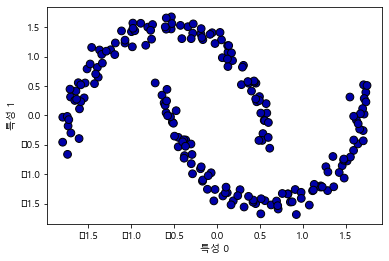

In [5]:
dbscan = DBSCAN(eps=0.7, min_samples = 6)
clusters = dbscan.fit_predict(X_scaled)

# 클러스터 할당을 표시한다.
plt.scatter(X_scaled[:,0], X_scaled[:,1], 
           c=clusters, 
           cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### 실습 : K-mean 의 그래프 추가
* K-mean 알고리즘을 적용한 y_predict 구하고, 그래프 표시 

In [11]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2)
kmeans.fit(X_scaled)
y_predict=kmeans.predict(X_scaled)


Text(0, 0.5, '특성 1')

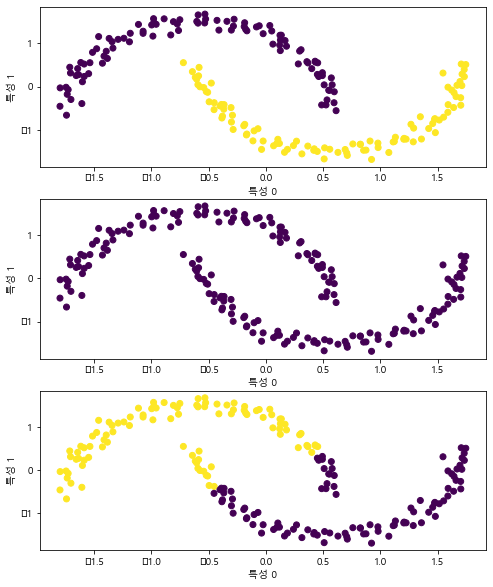

In [13]:

f1=X_scaled[:,0] # 첫번째 특성
f2=X_scaled[:,1] # 두번째 특성

plt.figure(figsize=(8,10))
plt.subplot(3,1,1)
plt.scatter(f1,f2,c=y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

plt.subplot(3,1,2)
plt.scatter(f1,f2,c=clusters)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

plt.subplot(3,1,3)
plt.scatter(f1,f2,c=y_predict)
plt.xlabel('특성 0')
plt.ylabel('특성 1')